PlotsForIntroToMC
=========

This notebook contains all of the code that I wrote to make plots for my IntroToMC presentation.
Each script reproduced here is available in the repository containing this notebook.
The scripts were lightly edited so that running a cell will cause a plot to appear.

The plot style that I use comes from "Chapter 21. Custom Graphics" in *Learning Base R* [Leemis 2016].

Generate exponential pdf, cdf, and inverse-cdf
---------------------------------------------------

In [1]:
#!/bin/Rscript
# exponentialPlots.R

fsf <- 2 # font size factor
dim <- 8 # dimension in inches of graphics region
lwd <- 4 # line width
titlefsf <- 4 # title font size factor

setupPlot <- function(plotname, eps) {
#
#    if (eps) {
#        fullname <- paste(plotname, ".eps", sep="")
#        postscript(fullname, width = dim, height = dim, horizontal = FALSE)
#    }
#    else {
#        fullname <- paste(plotname, ".png", sep="")
#        png(fullname)
#    }
}

doPlot <- function(x, y, title, invertAxesLimits) {

    xmin <- 0
    xmax <- 5
    xstep <- 1
    ymin <- 0
    ymax <- 1
    ystep <- 0.2

    if (invertAxesLimits) {
        xmax <- 1
        xstep <- 0.2
        ymax <- 5
        ystep <- 1
    }

    #plot.new()
    # set margin mai = c(bottom, left, top, right)
    par(mai = c(0.6, 0.7, 1, 0.3))
    plot(x, y, 
         type = "l",
         #lwd = lwd,
         xlab = "",
         ylab = "",
         xlim = c(xmin, xmax),
         ylim = c(ymin, ymax),
         axes = FALSE,
         main=title,
         cex.main=titlefsf
        )
    axis(side = 1, labels = TRUE, at = seq(xmin, xmax, xstep), font = 1, cex.axis = fsf)
    axis(side = 2, labels = TRUE, at = seq(ymin, ymax, ystep), font = 1, las = 1, cex.axis = fsf, las = 1)
    #text(5.17, -0.04, xlabel, font = 1, xpd = TRUE, cex = fsf)
    #text(-0.1, 1.06, ylabel, font = 1, xpd = TRUE, cex = fsf)
}

plotExponentialPDF <- function(plotname, title, eps) {

    setupPlot(plotname, eps)

    # plot exponential pdf f(x) = e^-x
    x <- seq(0, 5, length=100)
    y <- dexp(x)

    doPlot(x, y, title, FALSE)
}

plotExponentialCDF = function(plotname, title, eps) {

    setupPlot(plotname, eps)

    # plot exponential cdf F(x) = 1 - e^-x
    x <- seq(0, 5, length=100)
    y <- pexp(x)

    doPlot(x, y, title, FALSE)
}

plotExponentialInvCDF = function(plotname, title, eps) {

    setupPlot(plotname, eps)

    # plot exponential cdf F(x) = 1 - e^-x
    x <- seq(0, 1, length=1000)
    y <- qexp(x)

    doPlot(x, y, title, TRUE)

    # draw vertical asymptote at x = 5
    abline(v = 1, lty = 2, lwd = lwd)

}

eps <- TRUE
pdfTitle <- expression(f(x) == e^-x)
cdfTitle <- expression(F(x) == 1 - e^-x)
invCDFTitle <- expression(F^{-1} * (u) == -ln(1 - u))
#plotExponentialPDF("expPDF", pdfTitle, eps)
#plotExponentialCDF("expCDF", cdfTitle, eps)
#plotExponentialInvCDF("expInvCDF", invCDFTitle, eps)

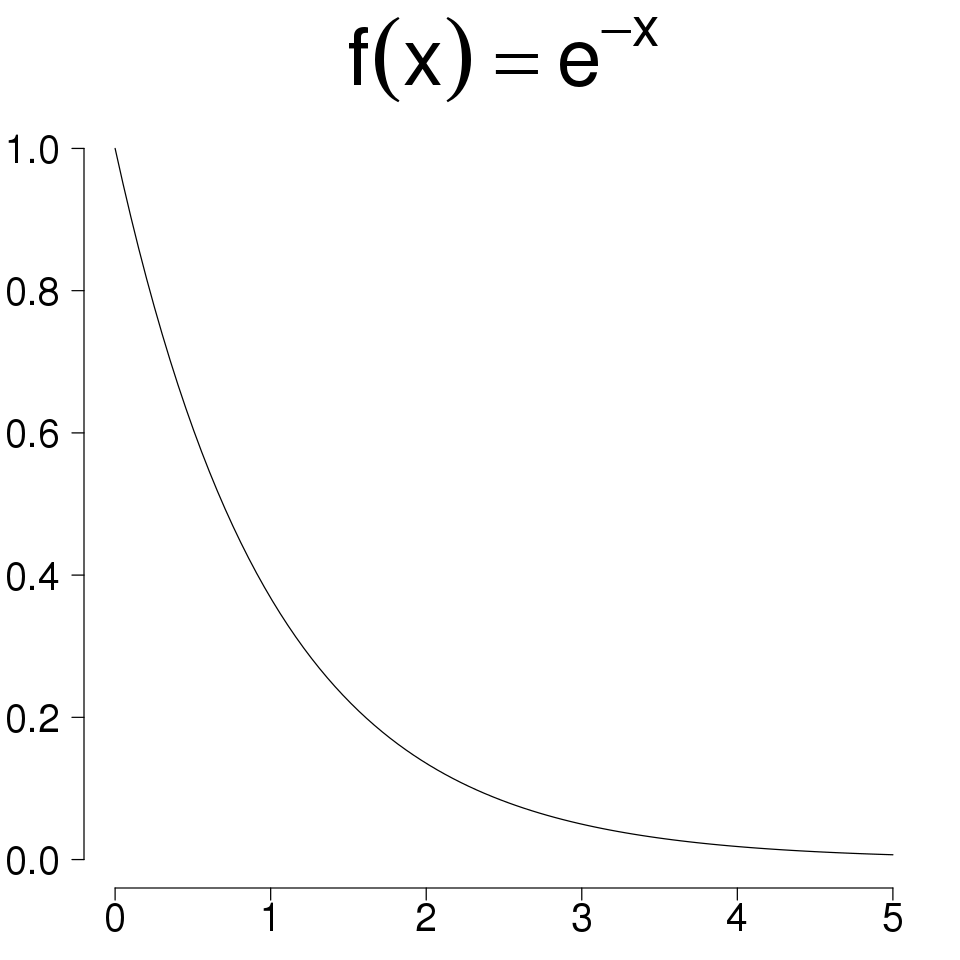

In [2]:
plotExponentialPDF("expPDF", pdfTitle, eps)

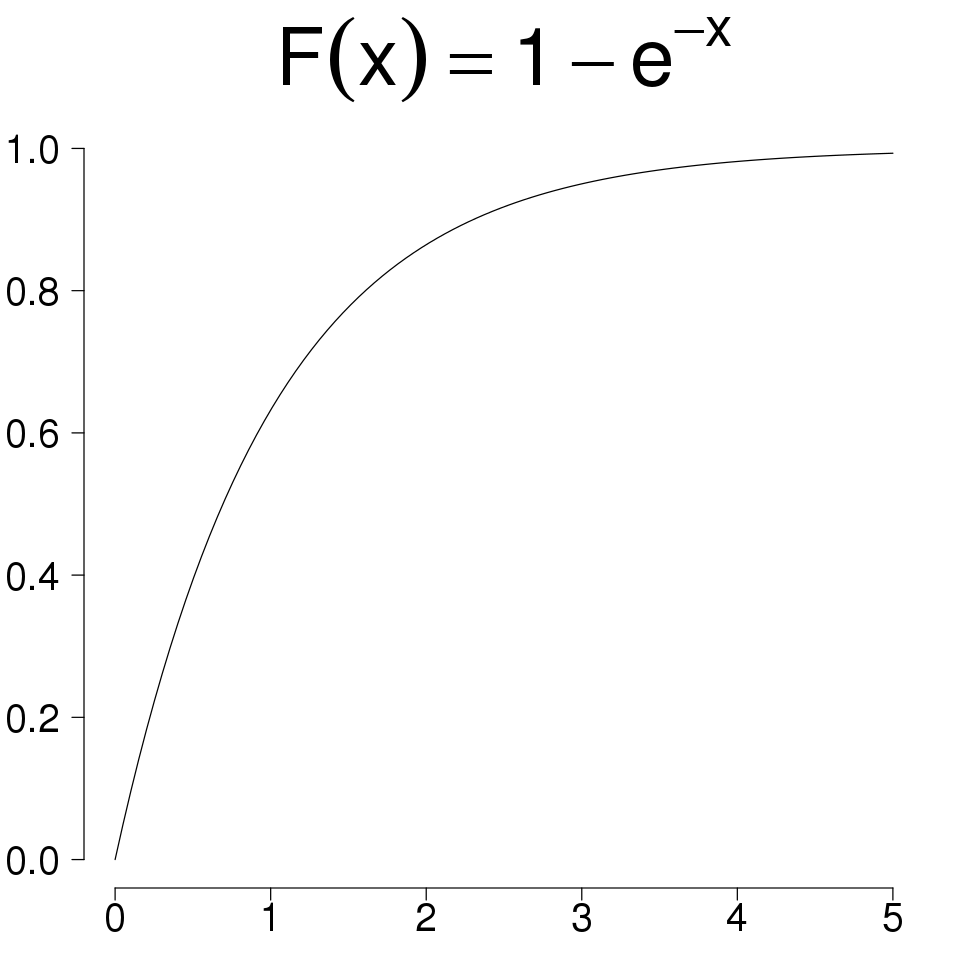

In [3]:
plotExponentialCDF("expCDF", cdfTitle, eps)

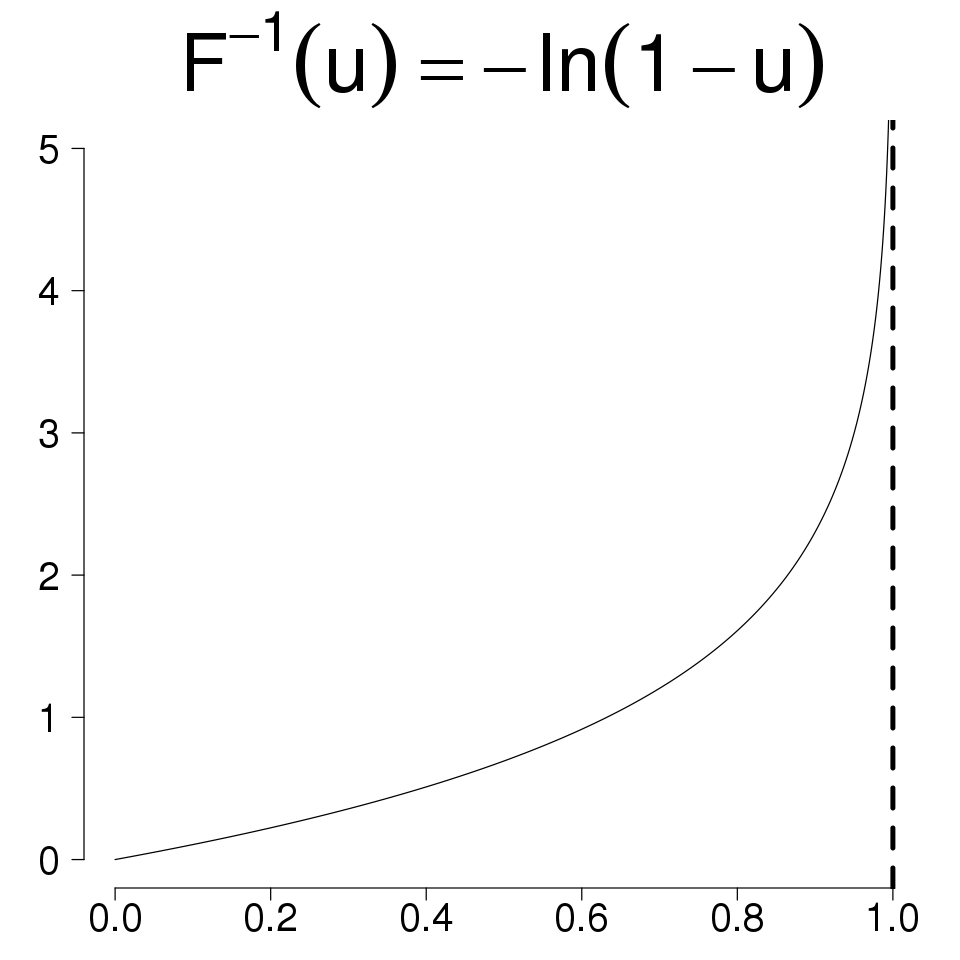

In [4]:
plotExponentialInvCDF("expInvCDF", invCDFTitle, eps)

Generate shaded normal plot
------------------------------

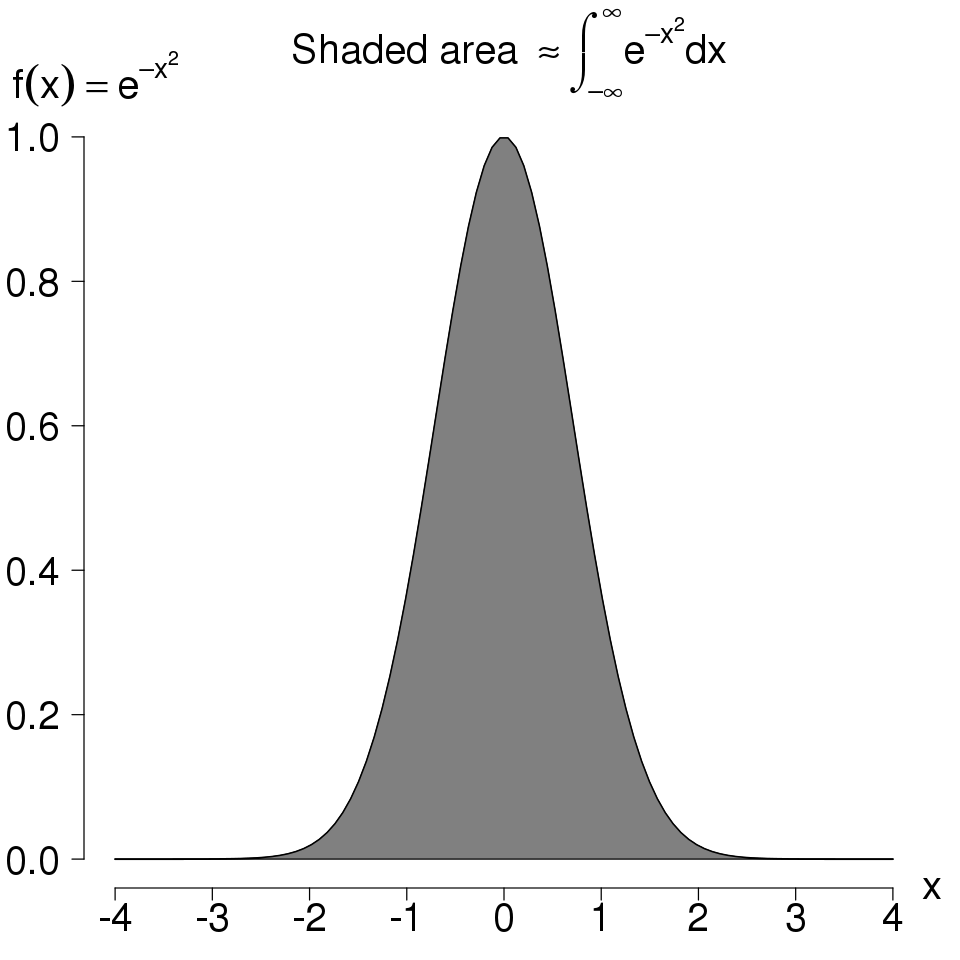

In [5]:
#!/bin/Rscript
# justnormal.R

fsf <- 2 # font size factor
dim <- 8 # dimension in inches of graphics region

f <- function(x) {
    exp(-(x*x))
}

#plotname <- "justnormal.eps"
#postscript(plotname, width = dim, height = dim, horizontal = FALSE)

# plot normal pdf f(x) = e^-x2
x <- seq(-4, 4, length=100)
hx <- f(x)
title <- expression(
         ~ "Shaded area " %~~%
         integral(e^-x^2*dx,-infinity,infinity) 
         )
ylabel <- expression(f(x) == e^-x^2)

# set margin mai = c(bottom, left, top, right)
par(mai = c(0.6, 0.7, 0.9, 0.3))
plot(x, hx, 
     type = "l",
     lwd = 1.5,
     xlab = "",
     ylab = "",
     xlim = c(-4, 4),
     ylim = c(0, 1),
     axes = FALSE,
     main=title,
     cex.main=fsf)
axis(side = 1, labels = TRUE, at = -4:4, font = 1, cex.axis = fsf)
axis(side = 2, labels = TRUE, at = seq(0,1,0.2), font = 1, cex.axis = fsf, las = 1)
text(4.4, -0.04, "x", font = 1, xpd = TRUE, cex = fsf)
text(-4.2, 1.08, ylabel, font = 1, xpd = TRUE, cex = fsf)

# Shade underneath curve
xpoly <- c(x, -4, 4)
ypoly <- c(hx, 0, 0)
polygon(xpoly, ypoly, col = gray(0.5))

Generate MC integration scatter plots
-------------------------------------------

Note: This script normally generates N + 2 plots (where "N" is the max exponent and the extra 2 are the convergence and walltime plots). I have reduced it to 1 so it will display something when run in this jupyter notebook. To make all N + 2 plots, run the original script in the repo at resources/mc_integration/normal.R 
---------------------------------------------------------------------

[1] "N, pi_estimate"
[1] "4 **  1 =       4, 16.000000, 0.000000"


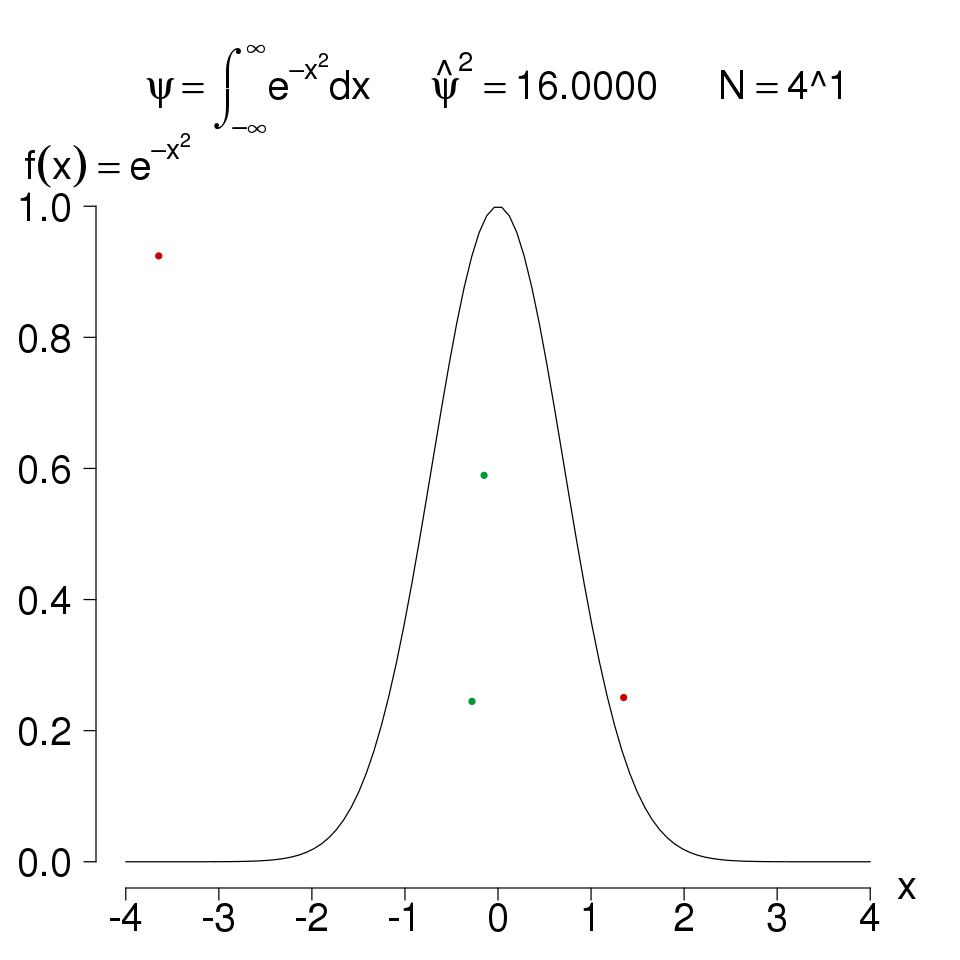

In [6]:
#!/bin/Rscript
# normal.R

fsf <- 2 # font size factor
dim <- 8 # dimension in inches of graphics region
darkgreen <- rgb(0, 153/256, 51/256)
darkred <- rgb(204/256, 0, 0)
endlogN <- 1
plot_convergence <- FALSE
plot_walltime <- FALSE
marker <- 20

f <- function(x) {
    exp(-(x*x))
}

# returns 2-tuple containing
# (pi_estimate, walltime)
mcint <- function(logN, fname = "normal") {
    base <- 4
    #plot.new()
    plotname <- sprintf("%s%d.eps", fname, logN)
    #postscript(plotname, width = dim, height = dim, horizontal = FALSE)
    n <- base ** logN

    # Perform MC integration
    # ----------------------
    starttime <- proc.time()
    x <- runif(n, -4, 4)
    y <- runif(n, 0, 1)

    hx <- f(x)
    inside <- y < hx 

    total_area <- 8
    integral_estimate <- ( sum(inside) / length(inside) ) * total_area
    pi_estimate <- integral_estimate ** 2
    time_to_compute_pi_estimate <- proc.time() - starttime
    walltime <- time_to_compute_pi_estimate[3] # 1:user, 2:sys, 3:elapsed

    print(sprintf("%d ** %2d = %7d, %f, %f", 
                  base, logN, n, pi_estimate, walltime))

    # Plot randomly-sampled (x,y) points
    # on top of a normal pdf f(x) = e^-x2
    # -----------------------------------
    integral_estimate_str <- sprintf("%1.4f", integral_estimate)
    pi_estimate_str <- sprintf("%1.4f", pi_estimate)
    n_str <- sprintf("4^%d", logN)
    title <- substitute(psi == integral(e^-x^2*dx,-infinity,infinity) 
                       #~~~~~~ hat(psi) == xxxpsihatxxx 
                       ~~~~~~ hat(psi)^2 == xxxpsihat2xxx
                       ~~~~~~ N == xxxNxxx,
                       list(#xxxpsihatxxx = integral_estimate_str, 
                            xxxpsihat2xxx = pi_estimate_str,
                            xxxNxxx = n_str))
    colors <- ifelse(inside, darkgreen, darkred)
    ylabel <- expression(f(x) == e^-x^2)

    # set margin mai = c(bottom, left, top, right)
    par(mai = c(0.6, 0.8, 1.5, 0.5))
    plot(x, y, 
         xlab = "", 
         ylab = "", 
         pch = marker, 
         col = colors, 
         xlim = c(-4, 4), 
         ylim = c(0, 1), 
         axes = FALSE,
         main = title,
         cex.main = fsf)
    axis(side = 1, labels = TRUE, at = -4:4, 
         font = 1, cex.axis = fsf)
    axis(side = 2, labels = TRUE, at = seq(0 , 1, 0.2), 
         font = 1, cex.axis = fsf, las =1)
    text(4.4, -0.04, "x", font = 1, xpd = TRUE, cex = fsf)
    text(-4.2, 1.07, ylabel, font = 1, xpd = TRUE, cex = fsf)

    # plot normal pdf f(x) = e^-x2
    x <- seq(-4, 4, length = 100)
    hx <- f(x)
    lines(x, hx)

    #dev.off()
    return(c(pi_estimate, walltime))
}

# Perform MC integration
# ----------------------
print("N, pi_estimate")
pi_estimates <- c()
walltimes <- c()
logNs <- seq(1, endlogN)
for (logN in logNs) {
    retval <- mcint(logN)
    pi_estimate <- retval[1]
    pi_estimates <- c(pi_estimates, pi_estimate)
    walltime <- retval[2]
    walltimes <- c(walltimes, walltime)
}

# Plot convergence
# ----------------
if (plot_convergence) {

    plot.new()
    postscript("pi_convergence.eps", width = dim, height = dim, horizontal = FALSE)

    x <- 1 / logNs
    y <- pi_estimates
    subset_x <- x[-1:-length(x)/4]
    subset_y <- y[-1:-length(x)/4]
    subset_logNs <- logNs[-1:-length(logNs)/4]

    #ymin <- min(subset_y)
    ymin <- 0
    #ymax <- max(subset_y)
    ymax <- 4
    #xmin <- min(subset_x)
    xmin <- 0
    #xmax <- max(subset_x)
    xmax <- 0.3
    xlabel <- "1/logN"
    ylabel <- expression(hat(psi)^2)
    title <- "Convergence plot"

    # set margin mai = c(bottom, left, top, right)
    par(mai = c(1.0, 1.0, 1.0, 1.0))
    plot(subset_x, subset_y,
         xlab = "", 
         ylab = "", 
         pch = marker, 
         xlim = c(xmin, xmax),
         ylim = c(ymin, ymax),
         axes = FALSE,
         main = title,
         cex.main = fsf)

    axis(side = 1, labels = TRUE, at = seq(xmin, xmax, 0.05),
         font = 1, cex.axis = fsf)
    axis(side = 2, labels = TRUE, at = seq(ymin, ymax, 0.5), 
         font = 1, cex.axis = fsf, las = 1)
    text(xmax + 0.035, ymin - 0.15, xlabel, font = 1, xpd = TRUE, cex = fsf)
    text(xmin - 0.01, ymax + 0.3, ylabel, font = 1, xpd = TRUE, cex = fsf)

    # connect scatterplot points with dashed line
    lines(subset_x, subset_y, type = "l")

    # draw in line at y = pi
    xx <- c(0, 1)
    yy <- c(pi, pi)
    lines(xx, yy, xaxt = "n")
    dev.off()
}

# Plot walltime
# -------------
if (plot_walltime) {
    plot.new()
    postscript("pi_walltime.eps", width = dim, height = dim, horizontal = FALSE)

    x <- logNs
    y <- walltimes
    subset_x <- x[-1:-length(x)/4]
    subset_y <- y[-1:-length(x)/4]

    #ymin <- min(subset_y)
    ymin <- 0
    #ymax <- max(subset_y)
    ymax <- 2
    xmin <- min(subset_x)
    xmax <- max(subset_x)
    xlabel <- "logN"
    ylabel <- "walltime (s)"
    title <- "Walltime plot"

    # set margin mai = c(bottom, left, top, right)
    par(mai = c(1.0, 1.1, 1.0, 1.0))
    plot(subset_x, subset_y,
         xlab = "", 
         ylab = "", 
         pch = marker, 
         xlim = c(xmin, xmax),
         ylim = c(ymin, ymax),
         axes = FALSE,
         main = title,
         cex.main = fsf)

    axis(side = 1, labels = TRUE, at = subset_x,
         font = 1, cex.axis = fsf)
    axis(side = 2, labels = TRUE, at = seq(ymin, ymax, 0.5), 
         font = 1, cex.axis = fsf, las = 1)
    text(xmax + 1, ymin - 0.1, xlabel, font = 1, xpd = TRUE, cex = fsf)
    text(xmin, ymax + 0.15, ylabel, font = 1, xpd = TRUE, cex = fsf)

    # connect scatterplot points with dashed line
    lines(subset_x, subset_y, type = "l")

}

Generate double normal line plot
------------------------------------

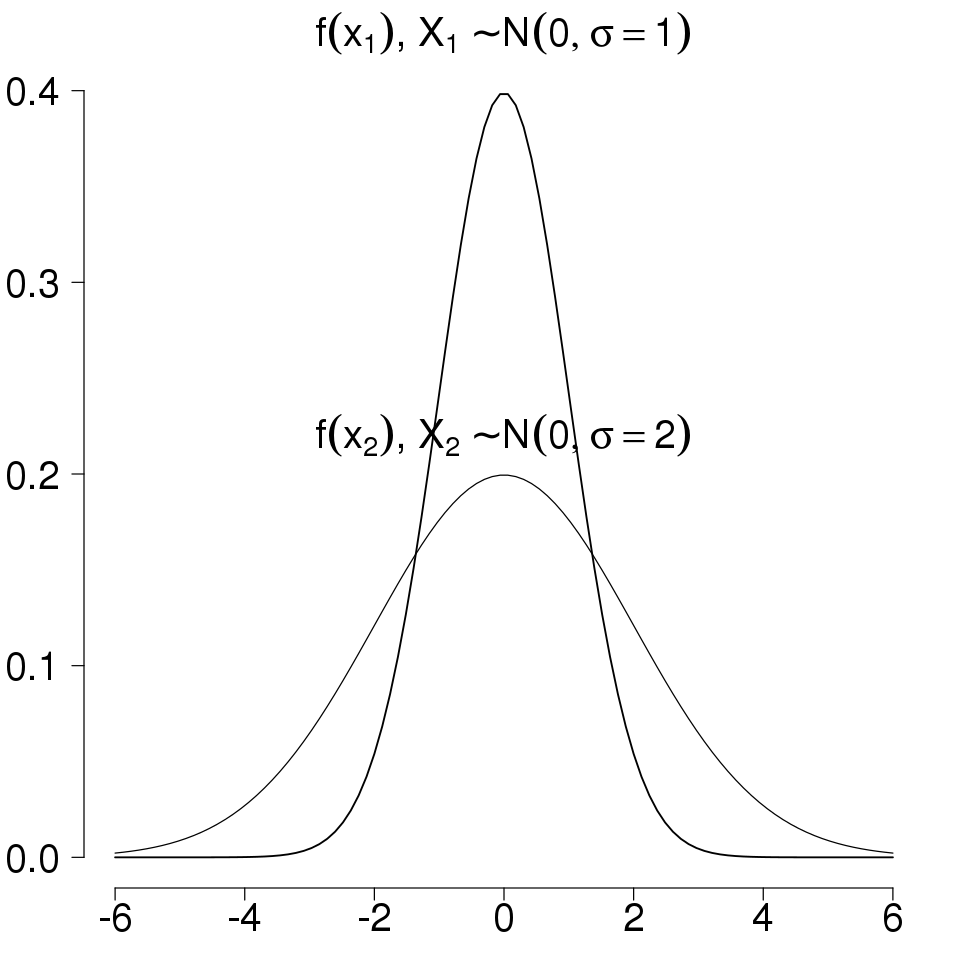

In [7]:
#!/bin/Rscript
# doubleNormalPlot.R

fsf <- 2 # font size factor
dim <- 8 # dimension in inches of graphics region

#plotname <- "doubleNormalPlot.png"
plotname <- "doubleNormalPlot.eps"
#postscript(plotname, width = dim, height = dim, horizontal = FALSE)
#png(plotname)

# plot normal pdf f(x) = e^-x2
x <- seq(-6, 6, length=100)
y1 <- dnorm(x, sd = 1)
y2 <- dnorm(x, sd = 2)

y1label <- expression(paste(f(x[1]), ", ", X[1] %~% N(0, sigma == 1)))
y2label <- expression(paste(f(x[2]), ", ", X[2] %~% N(0, sigma == 2)))

# set margin mai = c(bottom, left, top, right)
par(mai = c(0.6, 0.7, 0.5, 0.3))
plot(x, y1, 
     type = "l",
     lwd = 1.5,
     xlab = "",
     ylab = "",
     xlim = c(-6, 6),
     ylim = c(0, 0.4),
     axes = FALSE,
     #main=title,
     cex.main=fsf)
lines(x, y2)
axis(side = 1, labels = TRUE, at = seq(-6, 6, 2), font = 1, cex.axis = fsf)
axis(side = 2, labels = TRUE, at = seq(0,0.4,0.1), font = 1, cex.axis = fsf, las = 1)
text(0, 0.43, y1label, font = 1, xpd = TRUE, cex = fsf)
text(0, 0.22, y2label, font = 1, xpd = TRUE, cex = fsf)

Generate point estimator probability plot
-----------------------------------------

[1] "0.205,0.576,0.219,1e+05"


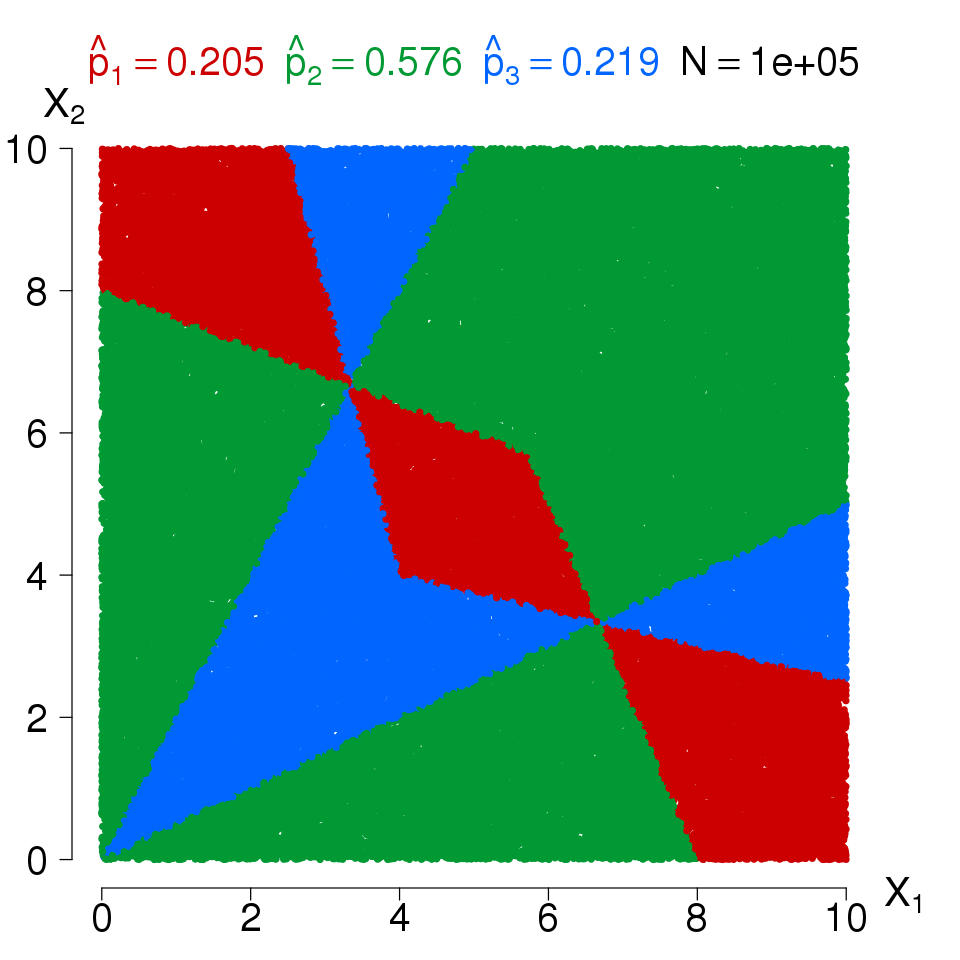

In [8]:
#!/usr/bin/Rscript
# pep.R
# Point Estimator Probability (PEP)
# Use MC to solve for probabilities

fsf <- 2 # font size factor
dim <- 8 # dimension in inches of graphics region
darkred <- rgb(204/255, 0, 0)
darkgreen <- rgb(0, 153/255, 51/255)
darkblue <- rgb(0, 102/255, 255/255)
marker <- 20

N <- 10 ** 5
theta <- 10

x1 <- runif(N, 0, theta)
x2 <- runif(N, 0, theta)

# Must use apply() to compute entry-by-entry
# mean(x1, x2), min(x1, x2), and max(x1, x2)
xmat <- matrix(c(x1, x2), ncol = 2)
xbar <- apply(xmat, 1, mean)
xmax <- apply(xmat, 1, max)
xmin <- apply(xmat, 1, min)

est1 <- 2 * xbar
est2 <- 3 * xmax / 2
est3 <- 3 * xmin

diff1 = abs(est1 - theta)
diff2 = abs(est2 - theta)
diff3 = abs(est3 - theta)

diffmat <- matrix(c(diff1, diff2, diff3), ncol = 3)
closest <- apply(diffmat, 1, which.min)

p1hat <- sum(closest == 1) / length(closest)
p2hat <- sum(closest == 2) / length(closest)
p3hat <- sum(closest == 3) / length(closest)

result <- sprintf("%0.3f,%0.3f,%0.3f,%1.e", p1hat, p2hat, p3hat, N)
print(result)

palette <- c(darkred, darkgreen, darkblue)
colors <- palette[closest]

#postscript("estimatorAreaPlot.eps", width = dim, height = dim, horizontal = FALSE)
#title <- substitute(hat(p)[1] == xxxp1hatxxx ~~~
#                   hat(p)[2] == xxxp2hatxxx ~~~
#                   hat(p)[3] == xxxp3hatxxx ~~~
#                   N == xxxNxxx,
#                   list(xxxp1hatxxx = sprintf("%0.3f", p1hat),
#                        xxxp2hatxxx = sprintf("%0.3f", p2hat),
#                        xxxp3hatxxx = sprintf("%0.3f", p3hat),
#                        xxxNxxx = N))

# set margin mai = c(bottom, left, top, right)
par(mai = c(0.6, 0.6, 1, 0.7))
plot(x1, x2, 
     xlab = "",
     ylab = "",
     pch = marker, 
     col = colors, 
     xlim = c(0,theta), 
     ylim = c(0,theta),
     axes = FALSE,
#     main = title,
     cex.main = fsf)

axis(side = 1, labels = TRUE, at = seq(0, theta, 2),
     font = 1, cex.axis = fsf)
axis(side = 2, labels = TRUE, at = seq(0, theta, 2), 
     font = 1, cex.axis = fsf, las =1)
text(theta + 0.8, -0.5, expression(X[1]), font = 1, xpd = TRUE, cex = fsf)
text(-0.5, theta + 0.6, expression(X[2]), font = 1, xpd = TRUE, cex = fsf)


# Make the title with estimators 
# colored the same as the plotted points
# to which they correspond using phantom,
# thank you plotmath!
p1title <- substitute(
                    hat(p)[1] == xxxp1hatxxx ~~            # p1 is only non-phantom
                    phantom(hat(p)[2] == xxxp2hatxxx) ~~
                    phantom(hat(p)[3] == xxxp3hatxxx) ~~
                    phantom(N == xxxNxxx),
                    list(xxxp1hatxxx = sprintf("%0.3f", p1hat),
                         xxxp2hatxxx = sprintf("%0.3f", p2hat),
                         xxxp3hatxxx = sprintf("%0.3f", p3hat),
                         xxxNxxx = sprintf("%1.e", N)))
p2title <- substitute(
                    phantom(hat(p)[1] == xxxp1hatxxx) ~~
                    hat(p)[2] == xxxp2hatxxx ~~            # p2 is only non-phantom
                    phantom(hat(p)[3] == xxxp3hatxxx) ~~
                    phantom(N == xxxNxxx),
                    list(xxxp1hatxxx = sprintf("%0.3f", p1hat),
                         xxxp2hatxxx = sprintf("%0.3f", p2hat),
                         xxxp3hatxxx = sprintf("%0.3f", p3hat),
                         xxxNxxx = sprintf("%1.e", N)))
p3title <- substitute(
                    phantom(hat(p)[1] == xxxp1hatxxx) ~~
                    phantom(hat(p)[2] == xxxp2hatxxx) ~~
                    hat(p)[3] == xxxp3hatxxx ~~            # p3 is only non-phantom
                    phantom(N == xxxNxxx),
                    list(xxxp1hatxxx = sprintf("%0.3f", p1hat),
                         xxxp2hatxxx = sprintf("%0.3f", p2hat),
                         xxxp3hatxxx = sprintf("%0.3f", p3hat),
                         xxxNxxx = sprintf("%1.e", N)))

Ntitle <- substitute(
                    phantom(hat(p)[1] == xxxp1hatxxx) ~~
                    phantom(hat(p)[2] == xxxp2hatxxx) ~~
                    phantom(hat(p)[3] == xxxp3hatxxx) ~~
                    N == xxxNxxx,                           # N is only non-phantom
                    list(xxxp1hatxxx = sprintf("%0.3f", p1hat),
                         xxxp2hatxxx = sprintf("%0.3f", p2hat),
                         xxxp3hatxxx = sprintf("%0.3f", p3hat),
                         xxxNxxx = sprintf("%1.e", N)))

title(p1title, col.main = darkred, cex.main = fsf)
title(p2title, col.main = darkgreen, cex.main = fsf)
title(p3title, col.main = darkblue, cex.main = fsf)
title(Ntitle, col.main = "black", cex.main = fsf)